# COMP5329 - Deep Learning

## Assignment 1

## Introduction


Questions to Answer:

- What is the aim of the study?
- Why is the study important?



Methods: 

- Pre-processing (if any)
  - One hot Encoding 

  
- The principle of different modules
- What is the design of your best model?


Modules to Develop:

- More than one hidden layer [5] 
- ReLU activation [5] 
- Weight decay [5] 
- Momentum in SGD [5] 
- Dropout [5] - Davide 
- Softmax and cross-entropy loss [5] 
- Mini-batch training [5]  
- Batch Normalization [5] 
- advanced ones (GELU, Adam) [5] 


## Importing Modules

In [30]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from matplotlib import animation

## Loading Data

In [31]:
X_train = np.load("train_data.npy") 
y_train = np.load("train_label.npy")
X_test = np.load("test_data.npy")
y_test = np.load("test_label.npy")


In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 128), (50000, 1), (10000, 128), (10000, 1))

## Data Analysis and Cleaning  

### Checking for Null Values

In [ ]:
X_df = pd.DataFrame(X_train)
X_df.isnull().sum(axis = 1).sum(axis = 0)

0

In [ ]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-6.401018,2.729039,1.501711,-2.953333,-4.452582,0.647150,0.568989,0.092877,3.451771,1.168442,...,0.031096,-0.568329,0.078852,-0.516114,-0.533383,0.182485,-0.116055,0.229334,-0.153583,0.544041
1,0.829783,-0.949943,6.003753,1.504931,-1.368500,1.225687,0.606882,-0.523086,2.584150,2.565564,...,-0.337097,0.064675,0.654332,0.340445,0.173168,-0.093886,-0.232945,0.043194,-0.015716,-0.289076
2,7.730200,-11.522102,-2.753621,2.333595,-1.584409,-2.272213,-0.610438,-1.361358,-0.730908,-1.125914,...,-0.182330,0.048012,0.008707,-0.028796,-0.267608,0.008759,-0.206363,0.014587,-0.355830,0.184288
3,-10.347817,0.010738,1.101019,-1.304540,-1.594870,0.867600,0.194107,0.232392,1.467262,-0.359152,...,0.216759,-0.097580,-0.080088,0.074279,0.280708,-0.017641,-0.328347,-0.054606,0.104805,0.031092
4,-2.625651,-4.969240,1.034585,3.306459,1.261683,0.031241,5.655493,1.426761,3.918136,-1.955221,...,-0.520018,0.045069,0.391479,-0.228605,-0.688175,0.614231,-0.200600,-0.128712,0.125463,0.117314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7.106037,-5.851024,9.370926,1.096726,1.235338,1.462150,1.220516,-1.103959,-0.337108,-1.372074,...,-0.274298,0.035031,-0.033049,0.109291,0.039772,-0.117336,-0.229673,-0.015273,0.063166,0.147253
49996,6.216884,1.898764,-7.042042,-7.881562,-7.762835,-0.456852,0.101925,1.620237,-2.611834,2.787903,...,0.121156,-0.326166,0.335146,0.179682,-0.135303,0.079713,-0.254859,-0.064302,-0.404108,-0.217575
49997,0.707347,-11.342521,-0.393915,2.729448,2.966034,-2.883045,-0.949199,-0.873824,-1.562315,0.505064,...,0.081551,0.170719,-0.246392,0.385915,0.128152,0.533686,0.065989,-0.490210,-0.214873,-0.036415
49998,11.367909,-3.375978,5.566198,0.780002,-0.936673,0.053950,3.242113,0.071869,-1.599667,-0.403857,...,-0.106515,0.005668,0.029485,-0.511626,-0.432588,-0.155915,-0.363004,-0.632456,-0.077754,0.561499


### Checking for Correlation among features

Average correlation between features:  0.4992849703505951
Minimum correlation between features:  -0.0014300592988098636 



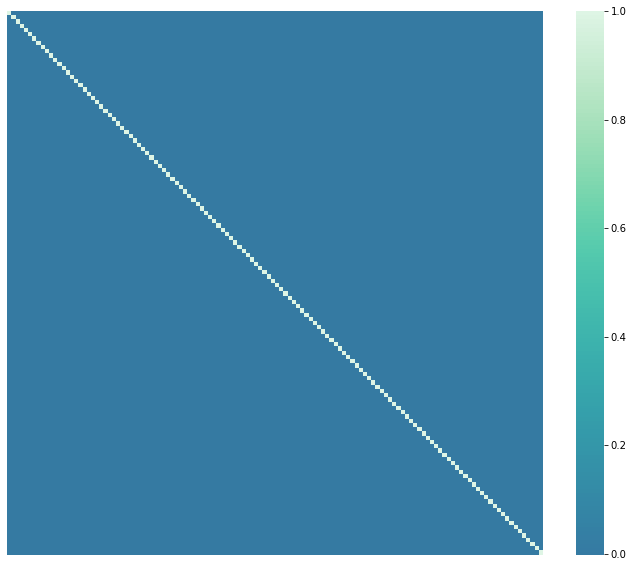

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))

corr = X_df.corr()
midpoint = (corr.values.max() - corr.values.min()) /2 + corr.values.min()

sns.heatmap(corr,cmap="mako", center=0, yticklabels=False , xticklabels=False)

print("Average correlation between features: ", midpoint)
print("Minimum correlation between features: ", corr.values.min(), "\n")

### Describe

In [ ]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-4.215048e-13,-7.495770e-13,-3.930063e-13,-1.653360e-13,-2.305300e-13,-1.024803e-13,-1.168784e-13,8.074483e-15,6.809585e-14,5.022009e-15,...,-5.747325e-15,-4.417151e-15,-7.267076e-17,1.284639e-15,8.325787e-15,7.726589e-15,-5.052992e-15,-3.772507e-15,2.291599e-15,7.001566e-15
std,7.440653e+00,4.628881e+00,3.570223e+00,2.645781e+00,2.621338e+00,2.312771e+00,2.272811e+00,2.031350e+00,1.982720e+00,1.654698e+00,...,3.323457e-01,3.317210e-01,3.311290e-01,3.267843e-01,3.261444e-01,3.256807e-01,3.225188e-01,3.203784e-01,3.190127e-01,3.168352e-01
min,-2.341521e+01,-1.723162e+01,-1.469483e+01,-1.362275e+01,-1.511164e+01,-1.195678e+01,-1.130377e+01,-1.216223e+01,-1.094746e+01,-8.628595e+00,...,-1.783069e+00,-1.598150e+00,-1.856335e+00,-1.715855e+00,-1.996416e+00,-1.841511e+00,-2.192051e+00,-2.068504e+00,-2.006121e+00,-2.594629e+00
25%,-5.169239e+00,-3.056684e+00,-2.357778e+00,-1.621247e+00,-1.642506e+00,-1.351916e+00,-1.375369e+00,-1.080187e+00,-1.241739e+00,-9.525253e-01,...,-2.041571e-01,-2.037133e-01,-2.019175e-01,-2.028923e-01,-1.991016e-01,-1.954332e-01,-1.956016e-01,-1.895680e-01,-1.929142e-01,-1.878896e-01
50%,-3.781362e-01,-1.404621e-02,-6.836257e-02,-2.806957e-02,-4.717560e-02,3.681515e-02,-2.861361e-02,1.483041e-02,-9.483685e-02,-3.974348e-03,...,6.612187e-04,-2.409627e-04,-1.038122e-03,-2.849236e-04,-4.266293e-03,-2.571195e-03,2.572448e-03,4.658348e-04,1.746909e-03,1.032960e-03
75%,4.792810e+00,3.019610e+00,2.276909e+00,1.602759e+00,1.558793e+00,1.368105e+00,1.348644e+00,1.104151e+00,1.156730e+00,9.436519e-01,...,2.038337e-01,2.012818e-01,2.011641e-01,2.024959e-01,1.943141e-01,1.948100e-01,1.961013e-01,1.936027e-01,1.944851e-01,1.846442e-01
max,2.558136e+01,2.106590e+01,1.501568e+01,1.413122e+01,1.694541e+01,1.207166e+01,1.154258e+01,1.306103e+01,1.112554e+01,1.202887e+01,...,2.234813e+00,1.824466e+00,1.873826e+00,2.104009e+00,2.514823e+00,2.049741e+00,2.145868e+00,2.536309e+00,2.062459e+00,2.626809e+00


## One Hot Encoding


In [33]:
y_train = y_train.reshape(y_train.shape[0])
y_train.shape

(50000,)

In [34]:
def toOneHot(arr, num_categories = 10):
    arr_OH = np.zeros((arr.shape[0], 10), dtype = np.int8)
    arr_OH[np.arange(arr.size),arr] = 1
    return arr_OH

In [35]:
y_train_OH = toOneHot(y_train, num_categories = np.max(y_train) + 1)
indices = np.random.randint(0,y_train.size, np.max(y_train) + 1)
print(f"One hot: {y_train_OH[indices, :]}, original array: {y_train[indices]}")

One hot: [[0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]], original array: [9 1 3 9 8 5 7 2 0 2]


### Activation Functions

The activation functions '__gelu' , '__gelu_deriv' , '__relu', '__relu_derv' are defined by us.

In [36]:
from math import *

class Activation(object):
  """
  The activation functions that are available are 'gelu', 'ReLu', 'softmax'
  """
  def __init__(self,activation='ReLu'):
        if activation == 'geLu':
            self.f = self.__geLU
            self.f_deriv = self.__gelu_deriv
        elif activation == 'ReLu':
            self.f = self.__ReLu
            self.f_deriv = self.__ReLu_deriv
        elif activation == 'softmax':
            self.f = self.__softmax
            self.f_deriv = self.__softmax_deriv
        else: 
          self.f = None
          self.f_deriv = None

  def __softmax(self, x):
    x = x - np.max(x) # We substract the maximum element from each element of x for numeric stability
    x = np.exp(x) # Calculating exponential of each element
    return x / np.sum(x, axis=1,keepdims=True)
  
  def __softmax_deriv(self, x):
    s = self.__softmax(x)
    return s * (1 - s)
    
  def __ReLu(self, x):
    return np.maximum(0, x)
  
  def __ReLu_deriv(self, a):
    
    res = np.zeros(a.shape)
    indices_positive = (a>0)
    res[indices_positive] = 1
    return res
    

### Hidden Layer


In [37]:
class HiddenLayer(object):    
    def __init__(self,n_in, n_out,
                 activation_last_layer='ReLu',activation='ReLu', W=None, b=None):
        """
        Typical hidden layer of a MLP: units are fully-connected and have
        sigmoidal activation function. Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        Hidden unit activation is given by: tanh(dot(input,W) + b)

        :type n_in: int
        :param n_in: dimensionality of input

        :type n_out: int
        :param n_out: number of hidden units

        :type activation: string
        :param activation: Non linearity to be applied in the hidden
                           layer
        """
        ## Initialized Vectors for Different Optimizers
        
        self.v_w = 0
        self.v_b = 0
        self.vadam_w = 0
        self.vadam_b = 0
        self.m_w = 0
        self.m_b = 0
        self.t = 0


        self.input=None
        self.activation=Activation(activation).f
        
        # activation deriv of last layer
        self.activation_deriv=Activation(activation).f_deriv
        if activation_last_layer:
            self.activation_deriv=Activation(activation_last_layer).f_deriv

        # we randomly assign small values for the weights as the initiallization
        self.W = np.random.uniform(
                low=-np.sqrt(6. / (n_in + n_out)),
                high=np.sqrt(6. / (n_in + n_out)),
                size=(n_in, n_out)
        )
        

        # we set the size of bias as the size of output dimension
        self.b = np.zeros(n_out,)
        
        # we set he size of weight gradation as the size of weight
        self.grad_W = np.zeros(self.W.shape)
        self.grad_b = np.zeros(self.b.shape)
        
    
    # the forward and backward progress (in the hidden layer level) for each training epoch
    # please learn the week2 lec contents carefully to understand these codes. 
    def forward(self, input):
        '''
        :type input: numpy.array
        :param input: a symbolic tensor of shape (n_in,)
        '''
        lin_output = np.dot(input, self.W) + self.b
        self.output = (
            lin_output if self.activation is None
            else self.activation(lin_output)
        )
        self.input=input
        return self.output
    
    def backward(self, delta, output_layer=False):    
        self.grad_W = np.atleast_2d(self.input).T.dot(np.atleast_2d(delta))
        self.grad_b = np.mean(delta,axis=0)
        if self.activation_deriv:
            delta = delta.dot(self.W.T) * self.activation_deriv(self.input)
        return delta

In [38]:
class Batch_Normalisation_Layer(object):
    def __init__(self, n_in, 
                 epsilon = 1e-8, momentum=0.9):
        """
        Batch Normalisation layer of a MLP: units are connected driectly with the next and the last layers.
        That is whi we only have n_in and not n_out, as they coincide.
        Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        :type n_in: int
        :param n_in: dimensionality of input

        :type epsilon: float
        
        :type momentum: float
        parameter used to update the running mean and variance
        """
        
        self.gamma = np.ones((n_in))
        self.beta = np.zeros((n_in))
        self.epsilon = epsilon
        self.momentum = momentum

        self.r_mean = np.zeros((n_in))
        self.r_var = np.zeros((n_in))

        self.x_norm = None
        self.X = None
        self.bn_mean = None
        self.bn_var = None
    
    def forward(self, X, train=True):
        if train:
            bn_mean = X.mean(axis = 0)
            bn_var = X.var(axis = 0)

            #what does this do?
            self.r_mean = self.momentum * self.r_mean + (1-self.momentum) * bn_mean
            self.r_var = self.momentum * self.r_var + (1-self.momentum) * bn_var

        elif train == False: 
            bn_mean = self.r_mean
            bn_var = self.r_var
        
        x_norm = (X - bn_mean)/(np.sqrt(bn_var + self.epsilon))
        X = self.gamma * x_norm + self.beta
        
        self.X, self.x_norm, self.bn_mean, self.bn_var = (X, x_norm, bn_mean, bn_var)
        
        return X 
        
    def backward(self, delta):

        P = delta.shape[0]

        d_gamma = np.sum(delta * self.x_norm, axis = 0)
        d_beta = np.sum(delta, axis = 0)

        dx_norm  = delta * self.gamma
        dx_c = dx_norm / np.sqrt(self.bn_var + self.epsilon)

        d_m = np.sum(-dx_c, axis=0) + 2/P * np.sum(dx_c, axis = 0)
        d_v = np.sum(dx_norm * dx_c * (-np.sqrt(self.bn_var + self.epsilon))**(-2), axis= 0) / 2 / (np.sqrt(self.bn_var + self.epsilon))

        d_x = dx_c + (d_m + d_v * 2 * dx_c) / P

        #already updating the parameters gamma and beta and avoiding returining them
        self.gamma -= 0.01 * d_gamma
        self.beta -= 0.01 * d_beta
        
        return d_x

            
    

### MultiLayerPerceptron Structure

In this structure we have also defined: 
- Momentum for SGD

In [39]:
def mini_batch(X, y, batch_size = 64):
  ''' 
  Returns a Matrix (batch_size x number of rows in one batch x columns of your dataset)
  Which will be used in training calling one by one batch, i.e. zeros[i] where i goes from 0 to batch_size.
  '''
  num_batches = X.shape[0] // batch_size
  indices = np.random.permutation(X.shape[0]) 
  X = X[indices]
  y = y[indices]
  X_b = np.zeros((num_batches, batch_size, X.shape[1]))
  y_b = np.zeros((num_batches, batch_size, y.shape[1]))

  for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, X.shape[0])
    X_b[i] = X[start_idx:end_idx, :]
    y_b[i] = y[start_idx:end_idx, :]

  return X_b, y_b

In [40]:
class MLP:
    """
    """ 
    # for initiallization, the code will create all layers automatically based on the provided parameters.     
    def __init__(self, layers, batch_norm=False, activation=[None,'ReLu', 'ReLu',None], update = None):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        :param update: the type of update of paramteres that is performed, if None, st_update is performed, can be "adam", "momentum" 
        """        

        ### initialize layers
        if not update:
            self.update = self.st_update
        elif update == "Adam":
            self.update = self.update_adam
        elif update == "Momentum":
            self.update = self.update_momentum

        self.layers=[]
        self.params=[]
        self.t = 0
        self.activation=activation
        for i in range(len(layers)-1):
            if batch_norm and i < len(layers) - 2:
                self.layers.append(Batch_Normalisation_Layer(layers[i]))
            self.layers.append(HiddenLayer(layers[i],layers[i+1],activation[i],activation[i+1]))
            

    # forward progress: pass the information through the layers and out the results of final output layer
    
    def drop_out(self,weights,p=0.5):
        msk = (np.random.rand(weights.shape[0], weights.shape[1])<p)
        weights[msk] = 0
        weights /= p
        return weights
    
    
    def forward(self, input, p_dropout=0):
        for i, layer in enumerate(self.layers):
            if i!=0 and p_dropout > 0:
                input = self.drop_out(input, p_dropout)
            output=layer.forward(input)
            input=output
        output = self.softmax(output)
        return output

  
    def criterion_CE(self,y,y_hat): # Cross-entropy loss
        
        def cross_entropy(y,y_hat):
            eps = 1e-10
            y_hat = np.clip(y_hat,eps, 1 - eps)
            loss_vector = -np.sum(y*np.log(y_hat),axis=1)# computes cross-entropy loss for each sample, and stores a vector of losses
            return np.mean(loss_vector)#returns mean loss
        
        delta = (y_hat - y)/y_hat.shape[0]
        loss = cross_entropy(y=y, y_hat=y_hat)#the y.shape[0] is because it is a matrix of one hot encoded predictions
                                            # which we have created at the beginning during pre processing
                                            # y.shape[0] represents the batch size. 

        # return loss and delta
        return loss, delta 

    # backward progress  
    def backward(self, delta):
        delta=self.layers[-1].backward(delta,output_layer=True)
        for layer in reversed(self.layers[:-1]):
            delta=layer.backward(delta)

    # update the network weights after backward.
    # make sure you run the backward function before the update function!    
    def st_update(self, lr, weight_decay=0):
        for layer in self.layers:
            if not isinstance(layer, Batch_Normalisation_Layer):
                layer.W -= (lr * layer.grad_W)*(1-weight_decay)
                layer.b -= (lr * layer.grad_b)*(1-weight_decay)
                

    def update_momentum(self, lr=0.1, momentum=0.9, weight_decay = 0):
        """
        lr -- parameter learning rate 
        momentum -- parameter specific to momentum
        Basically we follow the update structure: 
        1st we define layer.v_w and layer.v_b and initialize them to zero
        2nd we update the weights and biases following the momentum definition.
        We do not return anything because of course we are only updating weights.
        """

        for layer in self.layers:
            if not isinstance(layer, Batch_Normalisation_Layer):
                layer.v_w = momentum * layer.v_w + lr * layer.grad_W
                layer.v_b = momentum * layer.v_b + lr * layer.grad_b
                layer.W = (layer.W  - layer.v_w)*(1-weight_decay)
                layer.b = (layer.b - layer.v_b)*(1-weight_decay)
    
    def update_adam(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay = 0):
      """
      lr -- parameter learning rate 
      
      """
      self.t += 1

      for layer in self.layers:
          if not isinstance(layer, Batch_Normalisation_Layer):
            layer.vadam_w = beta2 * layer.vadam_w + (1-beta2) * ((layer.grad_W)**2)
            layer.vadam_b = beta2 * layer.vadam_b + (1-beta2) * ((layer.grad_b)**2)

            layer.m_w = beta1 * layer.m_w + (1-beta1) * ((layer.grad_W))
            layer.m_b = beta1 * layer.m_b + (1-beta1) * ((layer.grad_b))

            vhat_w = layer.vadam_w / (1 - ((beta2)**self.t))
            vhat_b = layer.vadam_b / (1 - ((beta2)**self.t))

            mhat_w = layer.m_w / (1 - ((beta1)**self.t))
            mhat_b = layer.m_b / (1 - ((beta1)**self.t))

            #final update on the weights

            layer.W = (layer.W  - ((lr/(np.sqrt(vhat_w) + epsilon)) * mhat_w))*(1-weight_decay)
            layer.b = (layer.b  - ((lr/(np.sqrt(vhat_b) + epsilon)) * mhat_b))*(1-weight_decay)

    # define the training function
    # it will return all losses within the whole training process.
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def val_train_split(self, X, y, size = 0.2):
        indices = np.random.permutation(X.shape[0])
        X = X[indices]
        y = y[indices]
        val_size = int(X.shape[0] * size)
        
        X_train, y_train = X[val_size:], y[val_size:]
        X_val, y_val = X[:val_size], y[:val_size]

        return X_train, X_val, y_train, y_val

    def fit(self, X, y, learning_rate=0.01, batch_size = 64, epochs=50, p_dropout=0, weight_decay=0):
        """
        Online learning.
        :param X: Input data or features
        :param y: Input targets one hot encoded
        :param learning_rate: parameters defining the speed of learning
        :param epochs: number of times the dataset is presented to the network for learning
        """ 
        X, y = mini_batch(X, y, batch_size = batch_size)
        X_train, X_val, y_train, y_val = self.val_train_split(X, y, size=0.2)
        train_loss = np.zeros(epochs)
        val_loss = np.zeros(epochs)
        
        for k in range(epochs):
            loss=np.zeros(X_train.shape[0])
            for it in range(X_train.shape[0]):
                i=np.random.randint(X_train.shape[0])
                
                # forward pass
                y_hat = self.forward(X_train[it],p_dropout=p_dropout) ## y hat dimensions are batch size * 10
                # backward pass
                loss[it],delta=self.criterion_CE(y_train[it],y_hat)
                self.backward(delta)
                # update
                self.update(learning_rate,weight_decay=weight_decay)
            train_loss[k] = np.mean(loss)
            y_val = y_val.reshape((-1,10))
            X_val = X_val.reshape(-1,128)
            val_loss[k] = self.criterion_CE(y_val, self.forward(X_val))[0]
        return train_loss, val_loss

    # define the prediction function
    # we can use predict function to predict the results of new data, by using the well-trained network.
    def predict(self, x):
        x = np.array(x)
        x = x.reshape((-1,x.shape[-1]))
        output = self.forward(x)
        output = output.argmax(axis=1)
        return output
    
    def test(self, X_test, y_test):
        accuracy = 0
        y_hat = self.predict(X_test)
        y_test = y_test.reshape(-1)
        accuracy = (y_hat == y_test).sum()/len(y_hat)
        return accuracy
        

### Confusion Matrix

In [79]:
def calculate_confusion_matrix(true_labels,predicted_labels):
    confusion_matrix=np.zeros((10,10),dtype=int)   
    for true,pred in zip(true_labels,predicted_labels):
        confusion_matrix[true,pred] += 1
    return confusion_matrix

In [80]:
def precision_calc(true_labels,predicted_labels):
    cm = calculate_confusion_matrix(true_labels,predicted_labels)
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    precision = true_positives / (true_positives + false_positives)
    macro_precision = np.mean(precision)
    return macro_precision

In [89]:
def metrics(true_labels,predicted_labels):
    confusion_matrix = calculate_confusion_matrix(true_labels,predicted_labels)
    
    ##Calculate and print out the Accuracy
    total_samples = np.sum(confusion_matrix)
    correct_samples = np.sum(np.diag(confusion_matrix))
    accuracy = correct_samples/total_samples

    print(f"Accuracy: {accuracy:.4f}")  #The .3f formats the float and rounds up to the third decimal value

    ##Calculate and print out the Precision
    true_positives = np.diag(confusion_matrix)
    false_positives = np.sum(confusion_matrix, axis=0) - true_positives
    precision = true_positives / (true_positives + false_positives)

    print(f"Precision: {np.mean(precision)}")

    ##Calculate and print out the Recall
    false_negatives = np.sum(confusion_matrix,axis=1) - true_positives
    recall = true_positives / (true_positives + false_negatives)

    #print(f"Recall: {recall:.3f}")

    ##Calculate Macro and Micro averaged precision and recall since they are 1D arrays of values and we only want one number
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)

    total_true_positives = np.sum(true_positives)
    total_false_positives = np.sum(false_positives)
    total_false_negatives = np.sum(false_negatives)

    micro_precision = total_true_positives / (total_true_positives + total_false_positives)
    micro_recall = total_true_positives / (total_true_positives + total_false_negatives)

    print(f"Macro-averaged precision: {macro_precision:.3f}")
    print(f"Macro-averaged recall: {macro_recall:.3f}")
    print(f"Micro-averaged precision: {micro_precision:.3f}")
    print(f"Micro-averaged recall: {micro_recall:.3f}")

    #From precision and recall we can calculate the F1 and F2 scores, macro-averaged
    f1_score = 2 * (precision * recall) / (precision + recall)
    f2_score = 5 * (precision * recall) / (4 * precision + recall)

    print(f"Macro-avergaed F1 score: {np.mean(f1_score):.3f}")
    print(f"Macro-avergaed F2 score: {np.mean(f2_score):.3f}")
    return 

# Experiments 

## One Layer 


### Standard update, no regularization

First we are trying to have one layer with [200,150,100,50] units with <b>standard</b> update and <b>without</b> any regularization

Accuracy on training set: 0.612, Accuracy on the test set: 0.523, Precision on the test set: 0.519


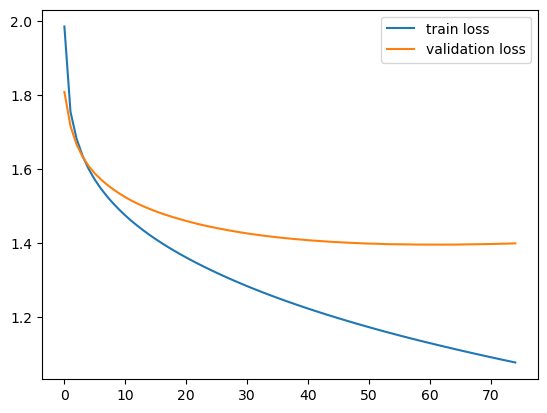

In [ ]:
model = MLP(layers = [X_train[0].shape[0],200, 10], activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.01, epochs=75)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.595, Accuracy on the test set: 0.518, Precision on the test set: 0.513


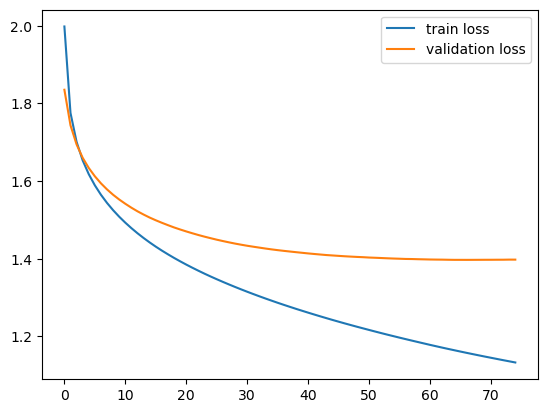

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.01, epochs=75)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.566, Accuracy on the test set: 0.508, Precision on the test set: 0.503


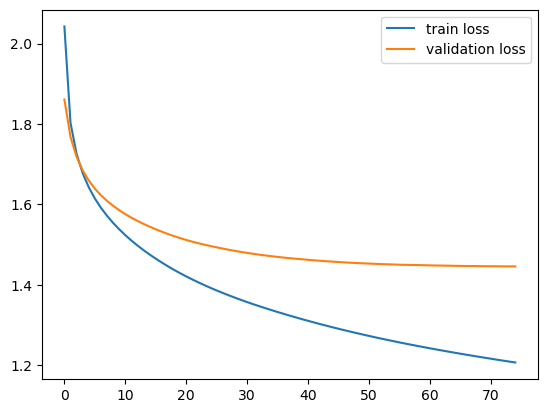

In [ ]:
model = MLP(layers = [X_train[0].shape[0],100, 10], activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.01, epochs=75)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.528, Accuracy on the test set: 0.488, Precision on the test set: 0.483


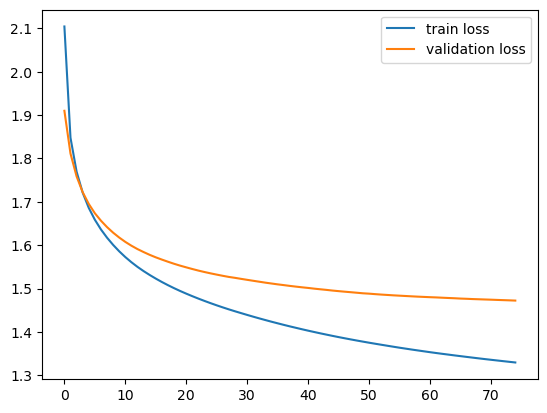

In [ ]:
model = MLP(layers = [X_train[0].shape[0],50, 10], activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.01, epochs=75)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Conclusion: As we can see at some point model starts to overfit, since the validation curve stays on the same level and training loss decreases

### Momentum, no regularization

Now, we are trying to perform similar experiments with Momentum. Since network converges faster, we are reducing learning rate to 0.001. The results are similar and we still have the problem of overfitting

Accuracy on training set: 0.581, Accuracy on the test set: 0.515, Precision on the test set: 0.511


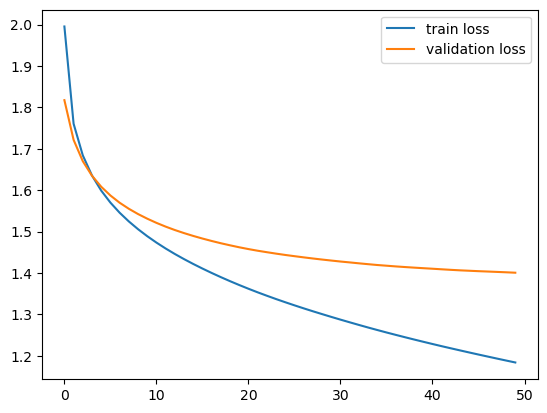

In [ ]:
model = MLP(layers = [X_train[0].shape[0],200, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=50)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.566, Accuracy on the test set: 0.513, Precision on the test set: 0.508


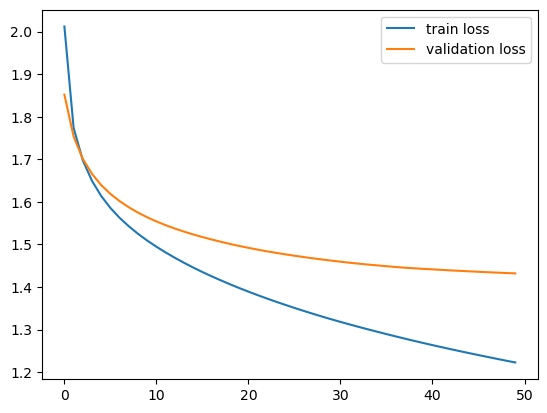

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=50)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.548, Accuracy on the test set: 0.502, Precision on the test set: 0.499


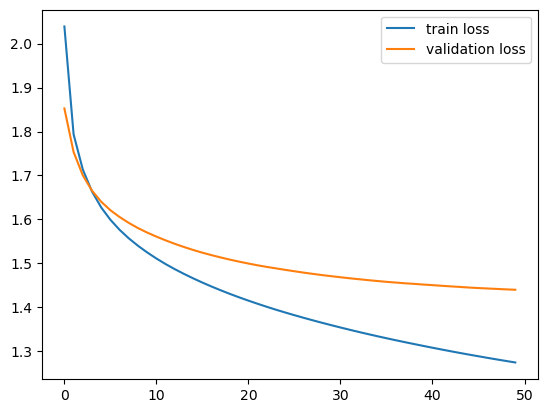

In [ ]:
model = MLP(layers = [X_train[0].shape[0],100, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=50)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.528, Accuracy on the test set: 0.491, Precision on the test set: 0.485


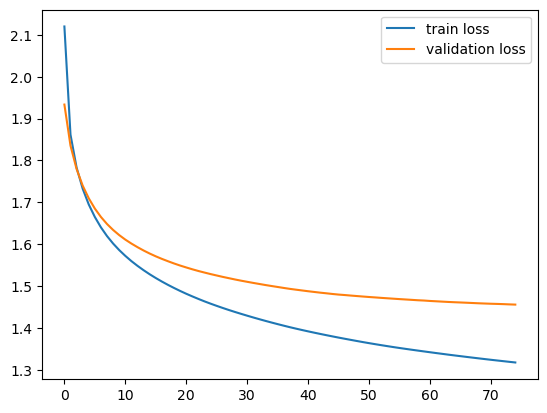

In [ ]:
model = MLP(layers = [X_train[0].shape[0],50, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=75)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

The results are similar but we still have problem of overfit.

### Momentum, different combinations of regularizations on one architecture of neural network (one hidden layer of 150 units)

In the section below, we are gonna explore, which combination of parameters works the best as regularization : weight decay with batch normalization, just weight decay or just batch normalization. Note that for now we are not considering dropout, since one should not use it in combination with batch normalization

Batch normalization and weight decay:

Accuracy on training set: 0.578, Accuracy on the test set: 0.532, Precision on the test set: 0.528


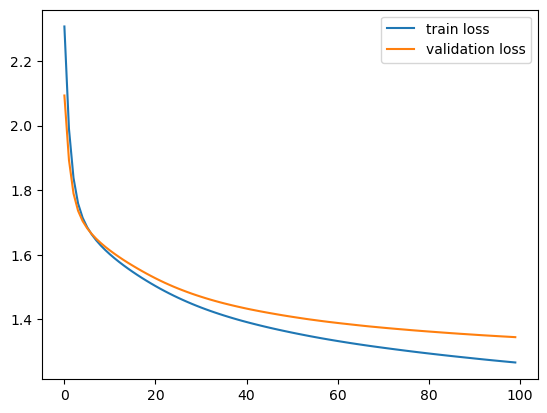

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Batch normalization:

Accuracy on training set: 0.648, Accuracy on the test set: 0.504, Precision on the test set: 0.501


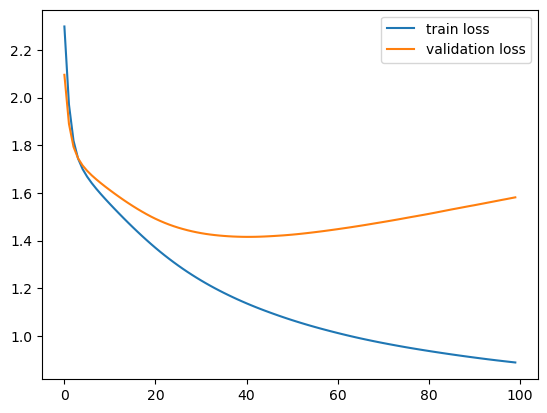

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Weight decay:

Accuracy on training set: 0.508, Accuracy on the test set: 0.496, Precision on the test set: 0.490


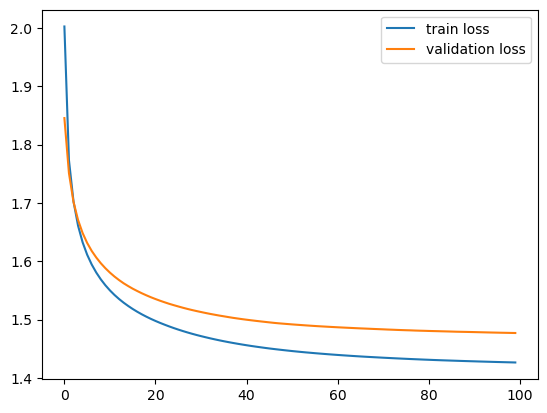

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

As we can see, weight decay in combination with batch normalization works the best. 

### Momentum, batch normalization, weight_decay

In the section below, we are going to try to choose, the best performing model with parametrization. We will also increase the number of epochs since larger model might take more time to converge

Accuracy on training set: 0.650, Accuracy on the test set: 0.563, Precision on the test set: 0.557


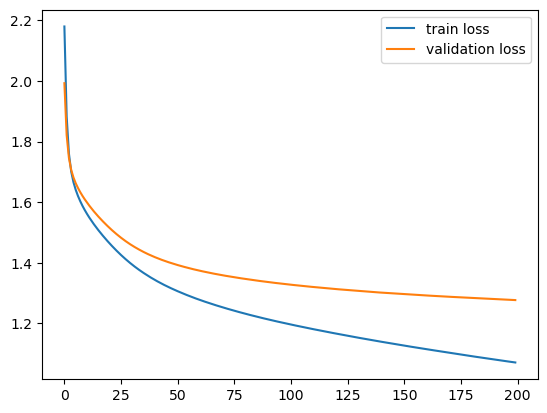

In [ ]:
model = MLP(layers = [X_train[0].shape[0],400, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.640, Accuracy on the test set: 0.556, Precision on the test set: 0.554


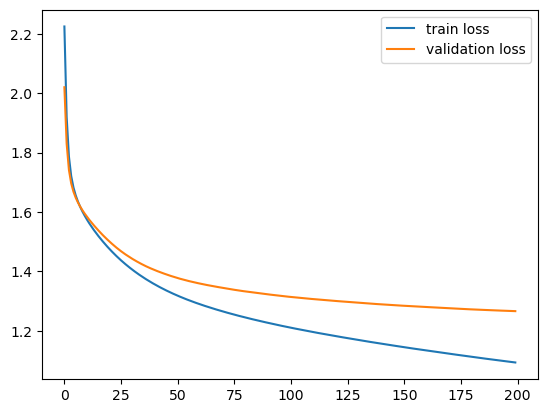

In [ ]:
model = MLP(layers = [X_train[0].shape[0],300, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.622, Accuracy on the test set: 0.549, Precision on the test set: 0.547


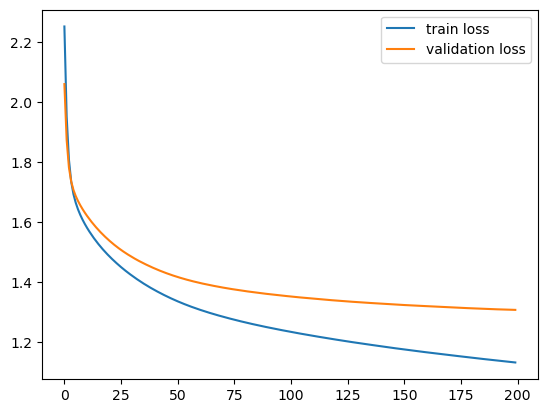

In [ ]:
model = MLP(layers = [X_train[0].shape[0],200, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.583, Accuracy on the test set: 0.532, Precision on the test set: 0.530


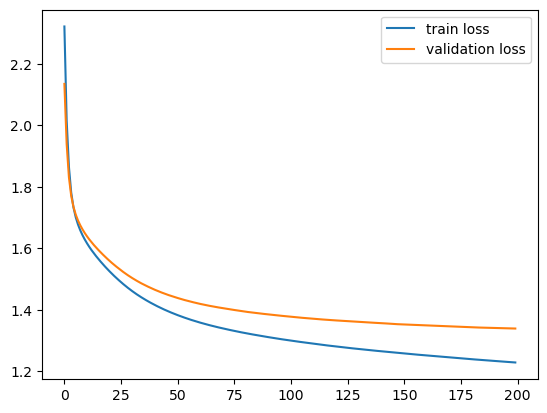

In [ ]:
model = MLP(layers = [X_train[0].shape[0],100, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

### Dropout, weight decay and both

Accuracy on training set: 0.455, Accuracy on the test set: 0.449, Precision on the test set: 0.443


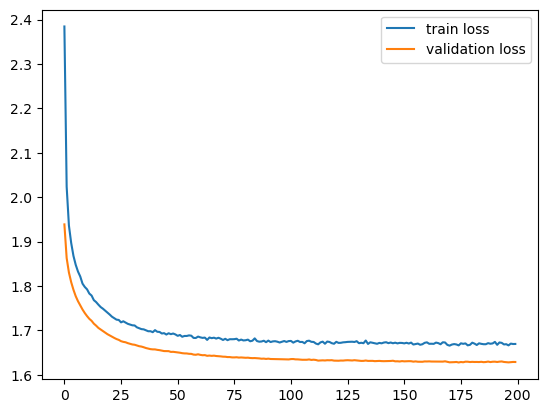

In [ ]:
model = MLP(layers = [X_train[0].shape[0],100, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.468, Accuracy on the test set: 0.464, Precision on the test set: 0.457


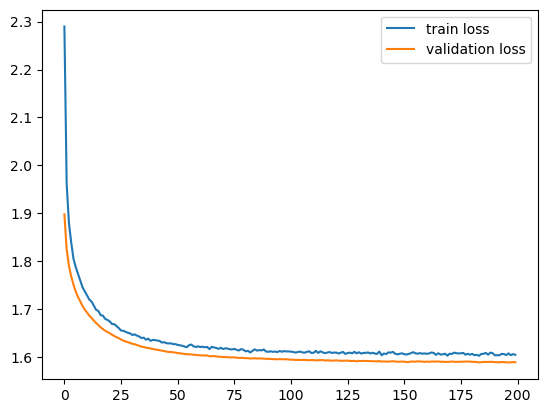

In [ ]:
model = MLP(layers = [X_train[0].shape[0],200, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.473, Accuracy on the test set: 0.471, Precision on the test set: 0.466


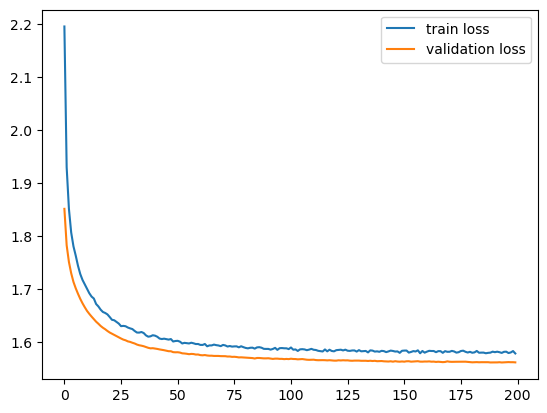

In [ ]:
model = MLP(layers = [X_train[0].shape[0],300, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.480, Accuracy on the test set: 0.471, Precision on the test set: 0.465


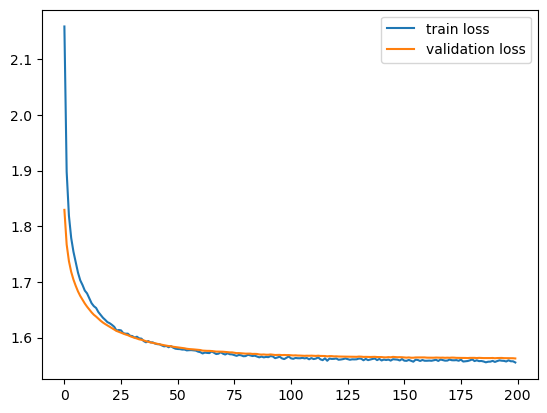

In [ ]:
model = MLP(layers = [X_train[0].shape[0],400, 10], update='Momentum', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

### Adam

Accuracy on training set: 0.646, Accuracy on the test set: 0.524, Precision on the test set: 0.520


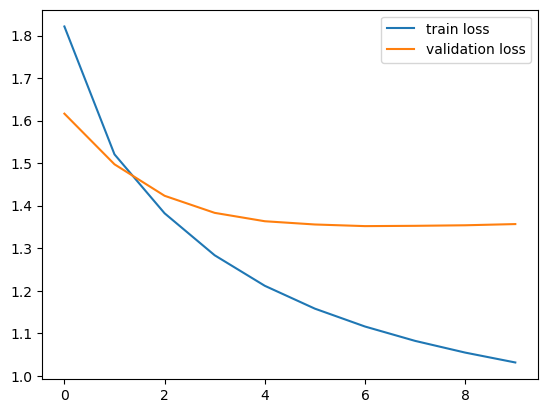

In [ ]:
model = MLP(layers = [X_train[0].shape[0],200, 10], update='Adam', batch_norm=True, activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=10)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.675, Accuracy on the test set: 0.537, Precision on the test set: 0.536


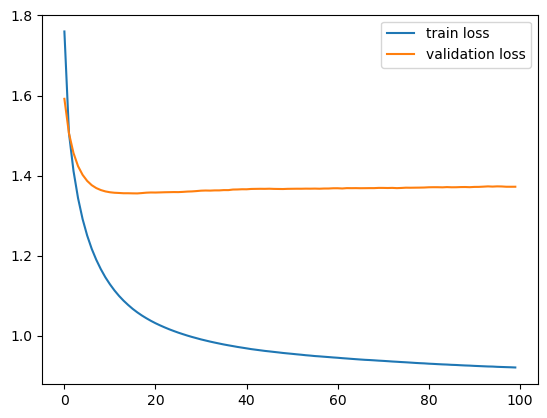

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Adam', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.524, Accuracy on the test set: 0.502, Precision on the test set: 0.498


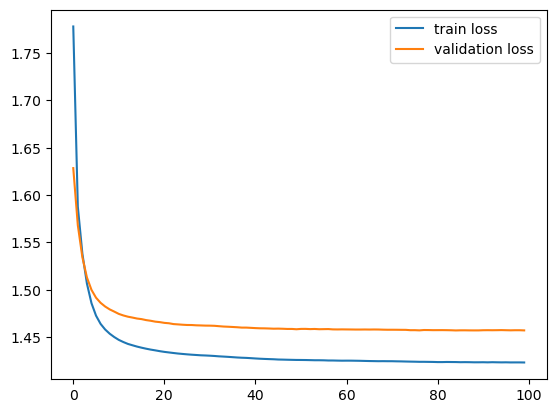

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Adam', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-3, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.591, Accuracy on the test set: 0.535, Precision on the test set: 0.529


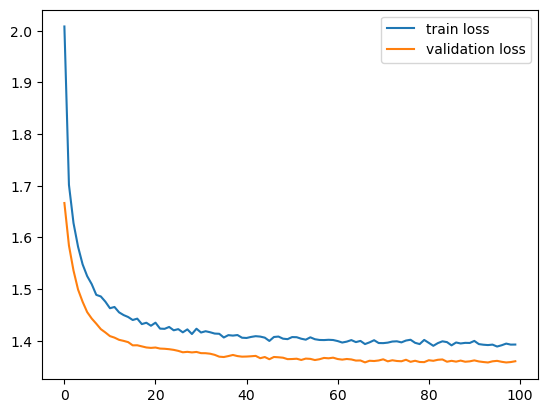

In [ ]:
model = MLP(layers = [X_train[0].shape[0],150, 10], update='Adam', activation = [None,'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4,p_dropout=0.5, epochs=100)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

## Two layers 

First of sizes [30, 60, 100, 200] (first just weight decay and batch_normalization), then explore dropout

### Momentum with Weight decay, batch normalization and both

#### Batch Normalization

Accuracy on training set: 0.508, Accuracy on the test set: 0.462, Precision on the test set: 0.458


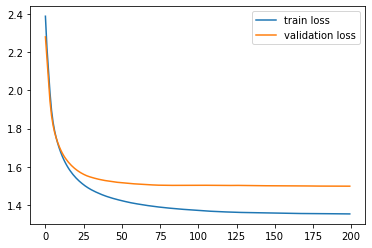

In [45]:
model = MLP(layers = [X_train[0].shape[0], 30, 30, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")  
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.567, Accuracy on the test set: 0.469, Precision on the test set: 0.465


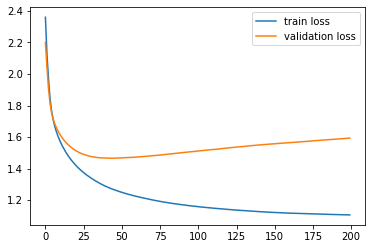

In [47]:
model = MLP(layers = [X_train[0].shape[0], 60, 60, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")  
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.633, Accuracy on the test set: 0.450, Precision on the test set: 0.447


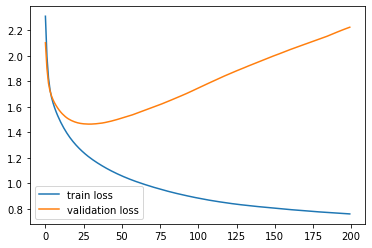

In [48]:
model = MLP(layers = [X_train[0].shape[0], 100, 100, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}") 
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.768, Accuracy on the test set: 0.458, Precision on the test set: 0.459


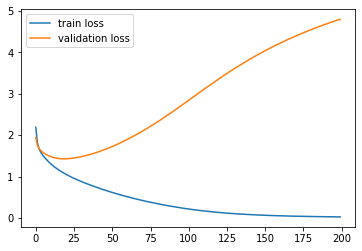

In [49]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")   
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Weight decay

Accuracy on training set: 0.487, Accuracy on the test set: 0.472, Precision on the test set: 0.465


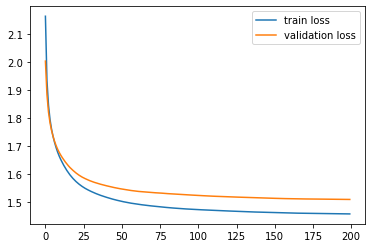

In [50]:
model = MLP(layers = [X_train[0].shape[0], 30, 30, 10],activation = [None,'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.519, Accuracy on the test set: 0.502, Precision on the test set: 0.497


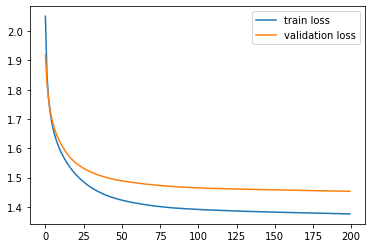

In [51]:
model = MLP(layers = [X_train[0].shape[0], 60, 60, 10],activation = [None,'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.530, Accuracy on the test set: 0.511, Precision on the test set: 0.506


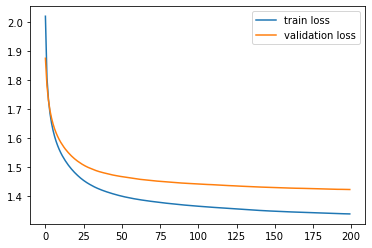

In [52]:
model = MLP(layers = [X_train[0].shape[0], 100, 100, 10],activation = [None,'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.546, Accuracy on the test set: 0.522, Precision on the test set: 0.515


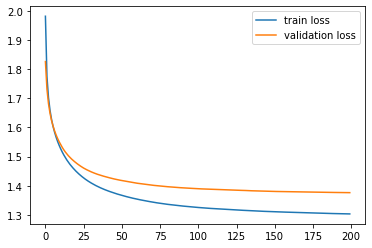

In [53]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10],activation = [None,'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.552, Accuracy on the test set: 0.525, Precision on the test set: 0.520


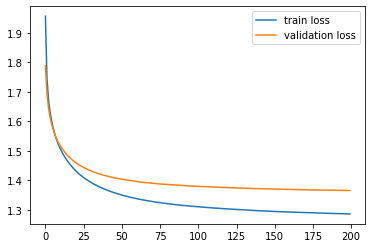

In [54]:
model = MLP(layers = [X_train[0].shape[0], 300, 300, 10],activation = [None, 'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.555, Accuracy on the test set: 0.526, Precision on the test set: 0.520


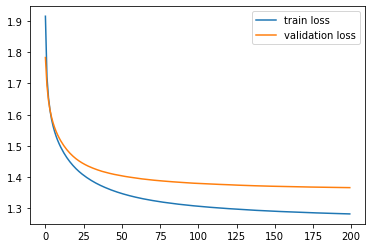

In [55]:
model = MLP(layers = [X_train[0].shape[0], 400, 400, 10],activation = [None, 'ReLu', 'ReLu', None], update='Momentum')
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Batch normalization and Weight decay

Accuracy on training set: 0.527, Accuracy on the test set: 0.490, Precision on the test set: 0.485


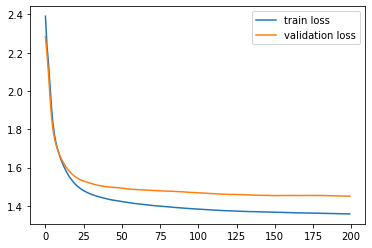

In [56]:
model = MLP(layers = [X_train[0].shape[0],30, 30, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.585, Accuracy on the test set: 0.525, Precision on the test set: 0.521


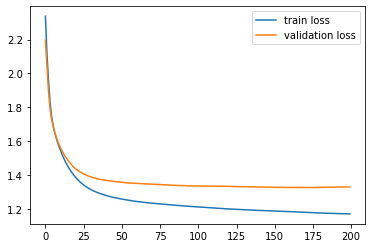

In [57]:
model = MLP(layers = [X_train[0].shape[0],60, 60, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.639, Accuracy on the test set: 0.527, Precision on the test set: 0.524


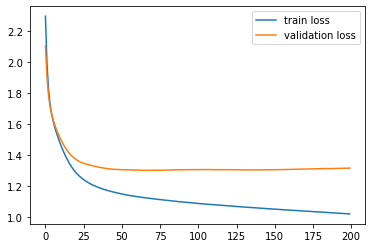

In [58]:
model = MLP(layers = [X_train[0].shape[0],100, 100, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.717, Accuracy on the test set: 0.539, Precision on the test set: 0.537


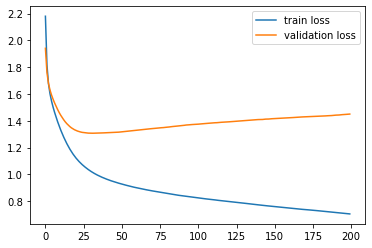

In [61]:
model = MLP(layers = [X_train[0].shape[0],200, 200, 10],activation = [None,'ReLu', 'ReLu',None], update='Momentum', batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

### Momentum with DropOut and Weight Decay

#### Only Dropout

Accuracy on training set: 0.466, Accuracy on the test set: 0.462, Precision on the test set: 0.457


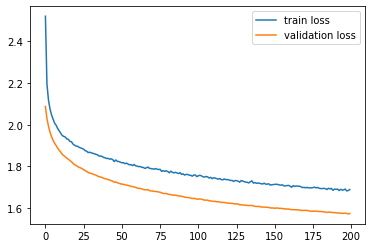

In [63]:
model = MLP(layers = [X_train[0].shape[0], 100, 100, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.511, Accuracy on the test set: 0.494, Precision on the test set: 0.488


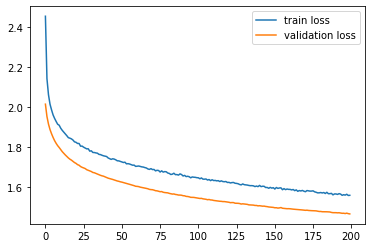

In [64]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.565, Accuracy on the test set: 0.530, Precision on the test set: 0.524


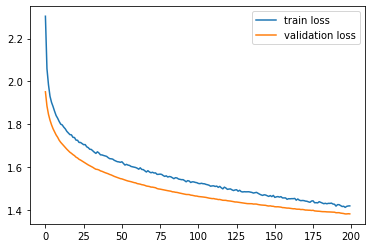

In [65]:
model = MLP(layers = [X_train[0].shape[0], 400, 400, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Dropout and Weight decay

Accuracy on training set: 0.399, Accuracy on the test set: 0.395, Precision on the test set: 0.383


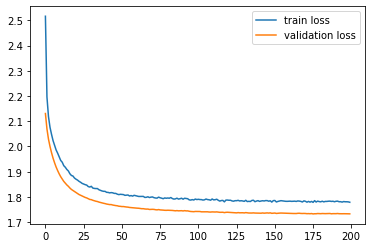

In [66]:
model = MLP(layers = [X_train[0].shape[0], 100, 100, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.419, Accuracy on the test set: 0.422, Precision on the test set: 0.410


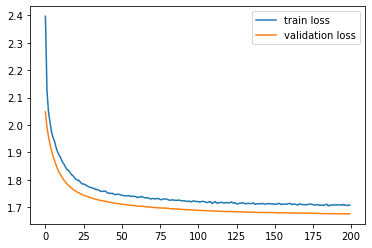

In [67]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

Accuracy on training set: 0.439, Accuracy on the test set: 0.436, Precision on the test set: 0.424


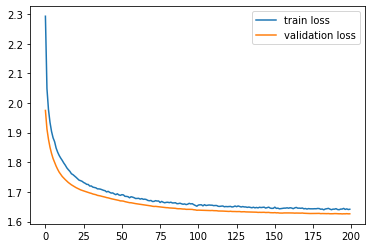

In [68]:
model = MLP(layers = [X_train[0].shape[0], 400, 400, 10], update='Momentum', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

### Adam

#### Without Regularization

Accuracy on training set: 0.880, Accuracy on the test set: 0.478, Precision on the test set: 0.478


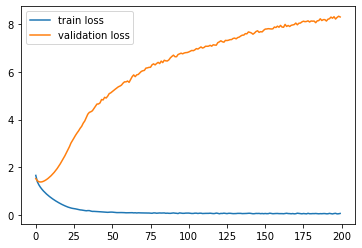

In [70]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Only Batch Normalization

Accuracy on training set: 0.794, Accuracy on the test set: 0.455, Precision on the test set: 0.459


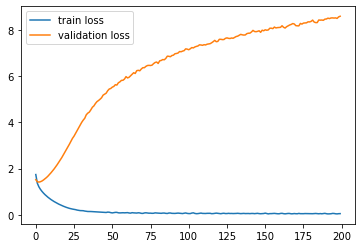

In [71]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None], batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Only Weight decay

Accuracy on training set: 0.808, Accuracy on the test set: 0.494, Precision on the test set: 0.507


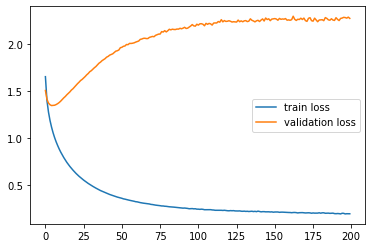

In [72]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Only Dropout

Accuracy on training set: 0.671, Accuracy on the test set: 0.546, Precision on the test set: 0.557


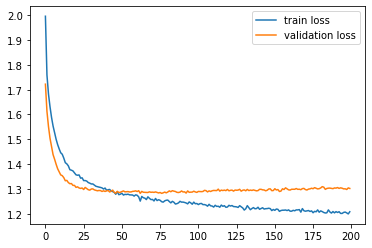

In [73]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, p_dropout= 0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Weight decay and Batch normalization

Accuracy on training set: 0.783, Accuracy on the test set: 0.473, Precision on the test set: 0.475


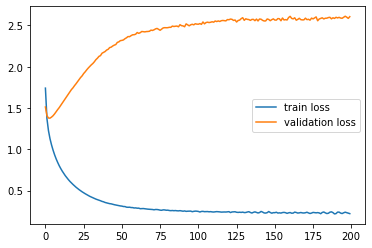

In [74]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None], batch_norm=True)
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

#### Weight decay and Dropout

Accuracy on training set: 0.615, Accuracy on the test set: 0.551, Precision on the test set: 0.545


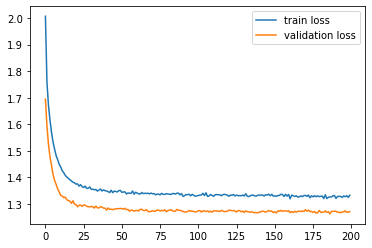

In [75]:
model = MLP(layers = [X_train[0].shape[0], 200, 200, 10], update='Adam', activation = [None,'ReLu', 'ReLu', None])
train_loss, val_loss = model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, p_dropout=0.5, epochs=200)
precision = precision_calc(true_labels = y_test, predicted_labels = model.predict(X_test))
print(f"Accuracy on training set: {model.test(X_train, y_train):.3f}, Accuracy on the test set: {model.test(X_test, y_test):.3f}, Precision on the test set: {precision:0.3f}")
x = np.arange(len(val_loss))
plt.plot(x, train_loss, label="train loss")
plt.plot(x, val_loss, label="validation loss")
plt.legend()
plt.show()

# Conclusion

Running Metrics function to return all the metrics from the best model we were able to construct.

In [90]:
model = MLP(layers = [X_train[0].shape[0], 400, 10], update='Momentum', batch_norm=True, activation = [None,'ReLu', None])
model.fit(X_train, toOneHot(y_train), learning_rate=0.001, weight_decay=1e-4, epochs=200)

metrics(true_labels = y_test, predicted_labels = model.predict(X_test))

# it should print:
# accuracy, precision, confusion mat, f1 score, f2 score, macro pres, macro avg pres, micro pres, micro avg pres, macro avg f1 scores, macro avg f2 scores

Accuracy: 0.5593
Precision: 0.5585152255567296
Macro-averaged precision: 0.559
Macro-averaged recall: 0.559
Micro-averaged precision: 0.559
Micro-averaged recall: 0.559
Macro-avergaed F1 score: 0.556
Macro-avergaed F2 score: 0.557
